# Lab 2 - 06/10

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
import myfunctions as f

## Ex 1

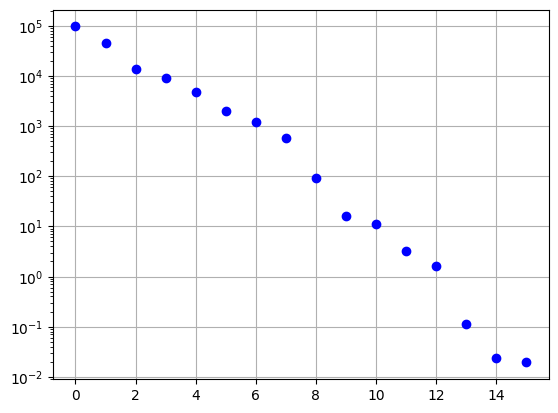

In [2]:
# Creation of train and test set
beans = pd.read_excel('Datasets/Dry_Bean_Dataset.xlsx')
data = beans.loc [:, beans.columns != "Class"]
output = beans.loc[:, "Class"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, output, test_size = 0.2, random_state=1)

# Data centering 
x_train = (x_train - x_train.mean())/x_train.std()

# Covariance
cov = np.dot(x_train.T, x_train)

# Eigenvalues, eigenvectors, and U
eigenvalues = np.linalg.eig(cov)[0]
eigenvectors = np.linalg.eig(cov)[1]
idx = np.argsort(eigenvalues)[::-1]

# Plot eigenvalue spectrum
plt.semilogy(sorted(eigenvalues, reverse=True), 'bo')
plt.grid()

In [3]:
# Fidelity - threshold = 0.85
n = 3   #retain the first 3 eigenvalues (2 is also ok)
fidelity = np.sum(eigenvalues[idx[0:n]])/np.sum(eigenvalues)
print("Number of eigenvalues: %d" %n)
print("Fidelity is %f" %fidelity)

# Preprocessing for labels
codes = {"BARBUNYA":0, "BOMBAY":1, "CALI":2, "DERMASON":3, "HOROZ":4, "SEKER":5, "SIRA":6}
labels = y_train.map(codes)

# Rotating data
U = eigenvectors
new_train = np.dot(x_train, U)

Number of eigenvalues: 3
Fidelity is 0.898984


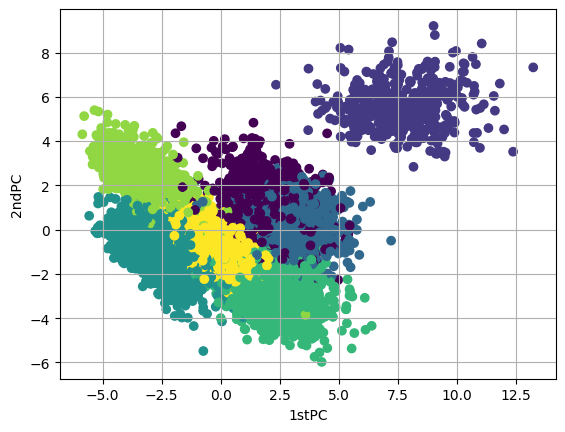

In [4]:
# Projecting the training set in the first two principal components
projected_2d = new_train[:, idx[0:2]]

plt.scatter(projected_2d[:,0], projected_2d[:,1], c=labels)
plt.xlabel("1stPC")
plt.ylabel("2ndPC")
plt.grid()

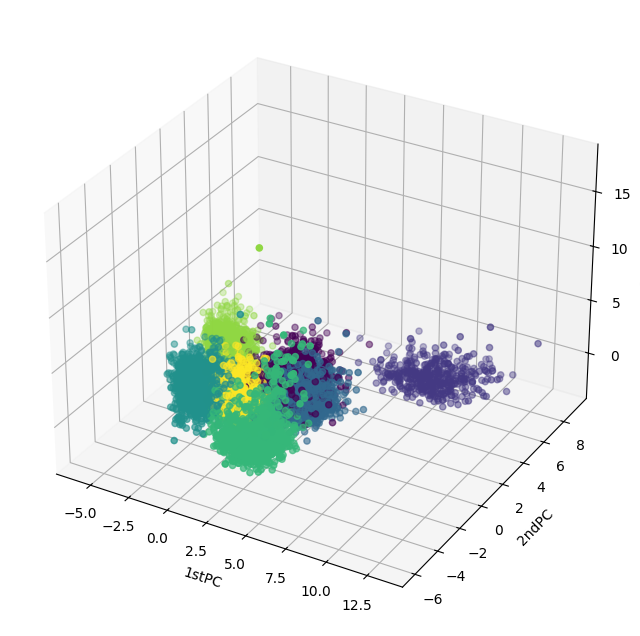

In [5]:
# Projecting the training set in the first three principal components

projected_3d = new_train[:,idx[0:3]]

plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(projected_3d[:,0], projected_3d[:,1], projected_3d[:,2], c=labels)
axes.set_xlabel("1stPC")
axes.set_ylabel("2ndPC")
axes.set_zlabel("3rdPC")
plt.show()

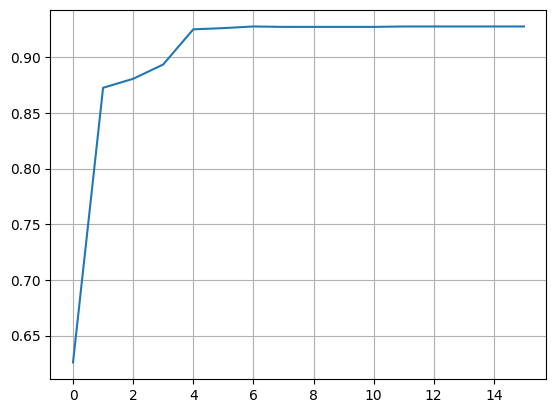

In [6]:
# Logistic regression
x_test = (x_test - x_test.mean())/x_test.std()
score = []

for i in range(1,17):
    model = linear_model.LogisticRegression(multi_class = 'multinomial', max_iter=1000)
    model.fit(new_train[:,0:i], y_train)

    new_test = np.dot(x_test, U)
    new_test = new_test[:,0:i]

    prediction = model.predict(new_test)
    score.append(model.score(new_test, y_test))

plt.plot(score)
plt.grid()
plt.show()

## Ex 2

Try to apply PCA to the Swiss Roll dataset (n = 1000) from Lab 1 and plot the
projection on the first two principal components. Choose an appropriate color
scheme for visualization and comment on your results.

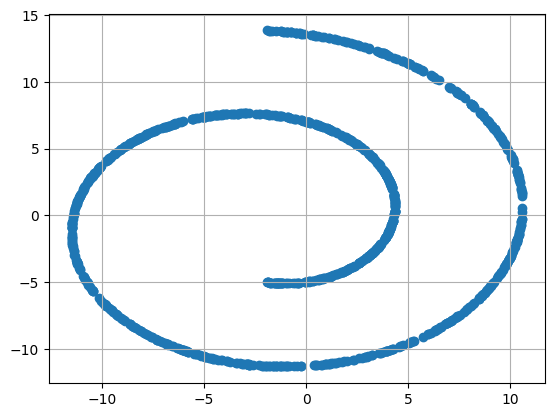

In [7]:
# Visualize data
unprocessed_data = f.swiss_roll(1000)
x = f.center_data(unprocessed_data)
plt.scatter(x[:,0], x[:,1])
plt.grid()
plt.show()

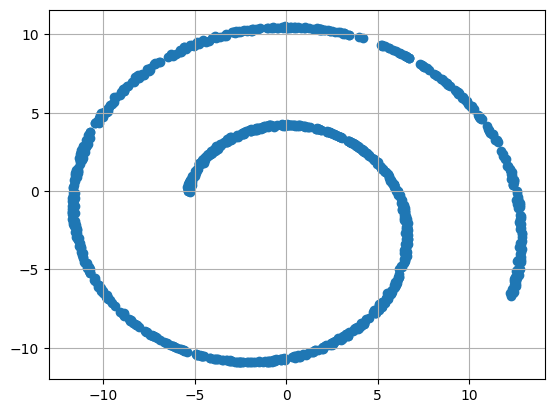

In [8]:
# Tranform data
transformed_data = f.pca(x, 2)

plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.grid()
plt.show()